## Hintergrund und Fragestellung

#### Hintergrund: 

Der World Happiness Report ist eine wegweisende Erhebung über den Zustand des globalen Glücks. Der erste Bericht wurde 2012 veröffentlicht, der zweite 2013, der dritte 2015 und der vierte im Update 2016. Der World Happiness Report
2017, der 155 Länder nach ihrem Glücksniveau einordnet, wurde bei den Vereinten Nationen bei einer Veranstaltung zum Internationalen Tag des Glücks am 20. März veröffentlicht. Der Bericht gewinnt weiterhin globale Anerkennung, da Regierungen, Organisationen und die Zivilgesellschaft zunehmend Glücksindikatoren miteinbeziehen, um ihre politischen Entscheidungen zu treffen. Führende Experten aus verschiedenen Bereichen – Wirtschaft, Psychologie, Statistik und ihre Auswertung, nationale Statistik, Gesundheit, öffentliche Ordnung und mehr – beschreiben, wie Messungen des Wohlbefindens effektiv verwendet werden können, um den Fortschritt von Nationen zu bewerten. Die Berichte beleuchten den Zustand des Glücks in der heutigen Welt und zeigen, wie die neue Glückswissenschaft persönliche und nationale Unterschiede des Glücks erklärt.

#### Quelle: 

https://www.kaggle.com/unsdsn/world-happiness?select=2019.csv

#### Hypothese (H1):

Es besteht eine Korrelation zwischen dem BIP pro Kopf (GDP_per_capita) und der Möglichkeit, freie Lebensentscheidungen treffen zu können (Freedom_to_make_life_choices).

#### Nullhypothese (H0): 

Zwischen den Kategorien "GDP_per_capita" und "freedom_to_make_life_choices" besteht keine Korrelation.

#### Warum ich mich für diese Hypothese entschieden habe:

Ich glaube, dass das finanzielle Einkommen die Möglichkeit mitbedingt, Lebensentscheidungen frei treffen zu können, denn finanzielle Sicherheit bietet einen größeren Freiraum um Lebensentscheidungen zu bestimmen.

## Beschreibung des Datensets

#### Inhalt: 

Die Punkteverteilung sowie die Listen zur Glückseligkeit nutzen Daten vom "Gallup World Pull". Die besagte Punkteverteilung basiert auf den Antworten, die auf die primären Lebens-Evaluations-Fragen der Umfrage gegeben wurden. Die Frage der ,"cantril ladder" fordert die Befragten auf, sich eine Leiter vorzustellen, das bestmögliche Leben für sie sei auf Stufe 10 zu finden, dementsprechend lässt sich das schlechtmöglichste Leben auf Stufe 0 antreffen. Ihnen wurde nun aufgetragen, ihr aktuelles Leben anhand dieser Leiter zu bewerten und sich selbst einzustufen. Die Bewertung und die Punkteverteilung ist von national repräsentativen Proben, die aus den Jahren 2013-2016 stammen und ebenfalls die Gullap Gewichtung benutzen um die Schätzung repräsentativ zu machen. Die Spalten, die der Glücks-Punkteverteilung  folgen, enthalten Schätzungen bezüglich 6 verschiedener Faktoren( – Wirtschaft- wirtschaftliches Produktionsverhalten- soziale Unterstützung – Lebenserwartung- Freiheit- fehlende Korruption- Großzügigkeit- ) und wie diese dazu beitragen, die Bewertung der Glückseligkeit in jedem Land im Vergleich zu einer Dystopie zu erhöhen. Ein hypothetisches Land, das für die sechs Faktoren Werte besitzt, die mit den Länder, die heutzutage am niedrigsten bewertet wurden, übereinstimmen, haben keinerlei Einfluss auf die letztendliche Punkteverteilung, die für für die jeweiligen Länder vergeben wurden. Allerdings können sie benutzt werden, um zu erklären, wieso manche Länder besser abschneiden als andere.

## Visualisierung und Analyse:

In [1]:
import pandas as pd
import seaborn as sns
import scipy as sp
import scipy.stats

In [2]:
happiness = pd.read_csv("2019.csv")

In [3]:
happiness

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [4]:
happiness.columns =['overall_Rank', 'country_or_Region', 'Score', 'GDP_per_capita', 'social_support', 'health_life_expectancy', 'freedom_to_make_life_choices', 'generosity', 'perpections_of_corruption']

In [5]:
happiness["GDP_class"] = happiness.GDP_per_capita.apply(
    lambda class_of_GDP: 1 if class_of_GDP > 1.25 else 0 
)

In [6]:
happiness["freedom_class"] = happiness.freedom_to_make_life_choices.apply(
    lambda class_of_freedom: 1 if class_of_freedom > 0.4 else 0
)

In [7]:
happiness

,overall_Rank,country_or_Region,Score,GDP_per_capita,social_support,health_life_expectancy,freedom_to_make_life_choices,generosity,perpections_of_corruption,GDP_class,freedom_class
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,1,1
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,1,1
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,1,1
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,1,1
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,1,1
...,...,...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,0,1
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,0,1
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,0,0
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,0,0


"high_GDP" = 1, "low_GDP" = 0 
"high_freedom" = 1, "low_freedom" = 0

Die Namen der Variablen wurden durch 1 und 0 ersetzt, um die Berechnung des Zweistichproben-t-Testes zu ermöglichen.
Der Wert von 1.25 wurde für ein hohes BIP ausgewählt, weil sich durch die "discribe" Funktion herausfinden
lässt, dass das obere Quartil bei 1.2325 beginnt.

Der Wert von 0,4 wurde für die Freiheit von Lebensentscheidungen ausgewählt (wurde ebenfalls durch die "discribe" Funktion herausgefunden), da der genauen Mittelwert 0.392571 lautet.

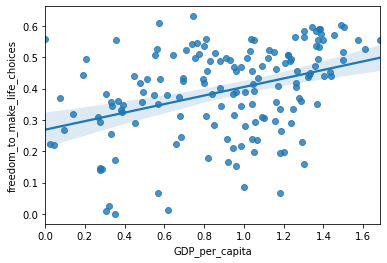

In [8]:
ax = sns.regplot(x=happiness.GDP_per_capita, y=happiness.freedom_to_make_life_choices)

Hier sehen wir einen leichten positiven Zusammhang zwischen der Kategorie "freedom_to_make_life_choices" und der Kategorie "GDP_per_capita"

In [9]:
happiness.describe()

,overall_Rank,Score,GDP_per_capita,social_support,health_life_expectancy,freedom_to_make_life_choices,generosity,perpections_of_corruption,GDP_class,freedom_class
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603,0.230769,0.532051
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538,0.422682,0.500579
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000,0.000000,0.000000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500,0.000000,1.000000
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250,0.000000,1.000000
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000,1.000000,1.000000


Anhand der "describe" Funktion habe ich bei der "lambda" Funktion entschieden, wie ich die Grenzen setze zwischen "low_GDP" und "high_GDP" und zwischen "low_freedom" und "high_freedom".

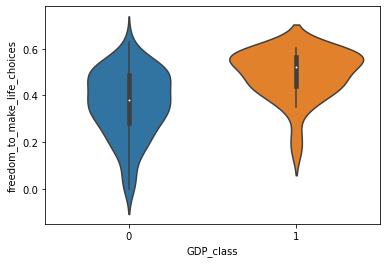

In [10]:
ax = sns.violinplot(data=happiness, x='GDP_class', y='freedom_to_make_life_choices')

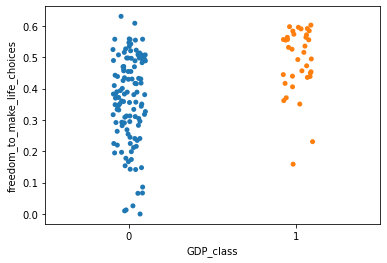

In [11]:
ax = sns.stripplot(data=happiness, x='GDP_class', y='freedom_to_make_life_choices')

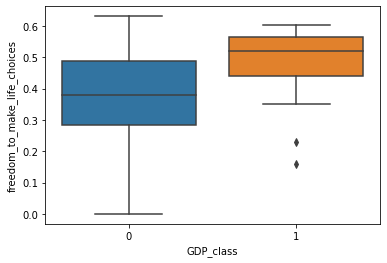

In [12]:
ax = sns.boxplot(data=happiness, x='GDP_class', y='freedom_to_make_life_choices')

Diese Plots beweisen, dass es einen Zusammenhang gibt zwischen dem BIP pro Kopf und der Möglichkeit, Lebensentscheidungen frei treffen zu können.
Es zeigt, dass sich die Länder mit einem mittlerem bis niedrigen BIP in der gesammten 
"freedom_to_make_life_choices" Skala befinden, wohingegen Länder mit einem hohem BIP 
sich ausschließlich im oberen Bereich der "freedom_to_make_life_choices" Skala befinden.

#### Korrelation: 

In [13]:
happiness['GDP_per_capita'].corr(happiness['freedom_to_make_life_choices'])

0.3790790721767715

Korrelation zwischen "GDP_per_capita" und "freedom_to_make_life_choices". 
Bei positvem Vorzeichen wachsen beide Merkmale gleichmäßig, das heißt, 
wird das eine Merkmal größer, so wächst auch das andere. Es ist zwar ein lineraer
Zusammenhang zu erkennen, jedoch kann dieser wegen der Nähe zu 0 auch zufällig sein.

#### Chi2 Unabhängigkeitstest:

In [8]:
happiness.groupby(["GDP_class", "freedom_class"]).size()

GDP_class  freedom_class
0          0                68
           1                52
1          0                 5
           1                31
dtype: int64

In [15]:
scipy.stats.fisher_exact([[52, 68], [31, 5]])

(0.12333965844402277, 6.381129921249844e-06)

Ein Zusammenhang ist zu erkennen, da der p-Wert unter der Annahme der Nullhypothese kleiner als das Signifikanzniveau alpha = 0.05 ist, somit  wurde die Nullhypothese widerlegt.

#### Zweistichproben-t-Test:

In [16]:
freedom_GDP_high = happiness[happiness.GDP_class == 1]['freedom_to_make_life_choices']
freedom_GDP_low = happiness[happiness.GDP_class == 0]['freedom_to_make_life_choices']

In [17]:
scipy.stats.ttest_ind(freedom_GDP_low,freedom_GDP_high)

Ttest_indResult(statistic=-4.9935566730368395, pvalue=1.5888625160173766e-06)

Der p-Wert liegt eindeutig unter dem Signifikanzniveau alpha = 0,05 und somit kann die Nullhypothese H0 widerlegt werden. Das bedeutet, dass ein signifikanter Unterschied zwischen diesen beiden Kategorien besteht. Somit ergibt sich ein eindeutiger Zusammenhang zwischen dem BIP pro Kopf und der Möglichkeit, Lebensentscheidungen frei treffen zu können.

## Kurzes Fazit der Ergebnisse

Zusammenfassend lässt sich sagen, dass die aufgestellte Hypothese (H1) "Es besteht eine Korrelation zwischen dem BIP pro Kopf (GDP per capita) und der Möglichkeit, freie Lebensentscheidungen treffen zu können (Freedom to make life choices)" durch die Analyse statistisch bewiesen wurde. Schon beim ersten Plotten der Grafiken zeigte sich ein Zusammenhang zwischen den beiden Kategorien "GDP_per_capita" und "freedom_to_make_life_choices". Die Korrelation der zuvor genannten Faktoren wurde mathematisch berechnet und damit ergab sich zunächst ein leichter Zusammenhang. Durch abschließende statistische Testverfahren wie dem Chi2-Test und dem Zweistichproben-t-Test konnte durch das Widerlegen der Nullhypothese (H0) eine signifikante Korrelation zwischen unseren Faktoren nachgewiesen werden. 
Abschließend lässt sich anhand der bestätigten Hypothese vermuten, dass die miteinander korrelierenden Faktoren einen Einfluss auf das ranking der Länder in der Gesamtskala haben.